# Tagging and Extraction
this help extract structured data from unstructured data
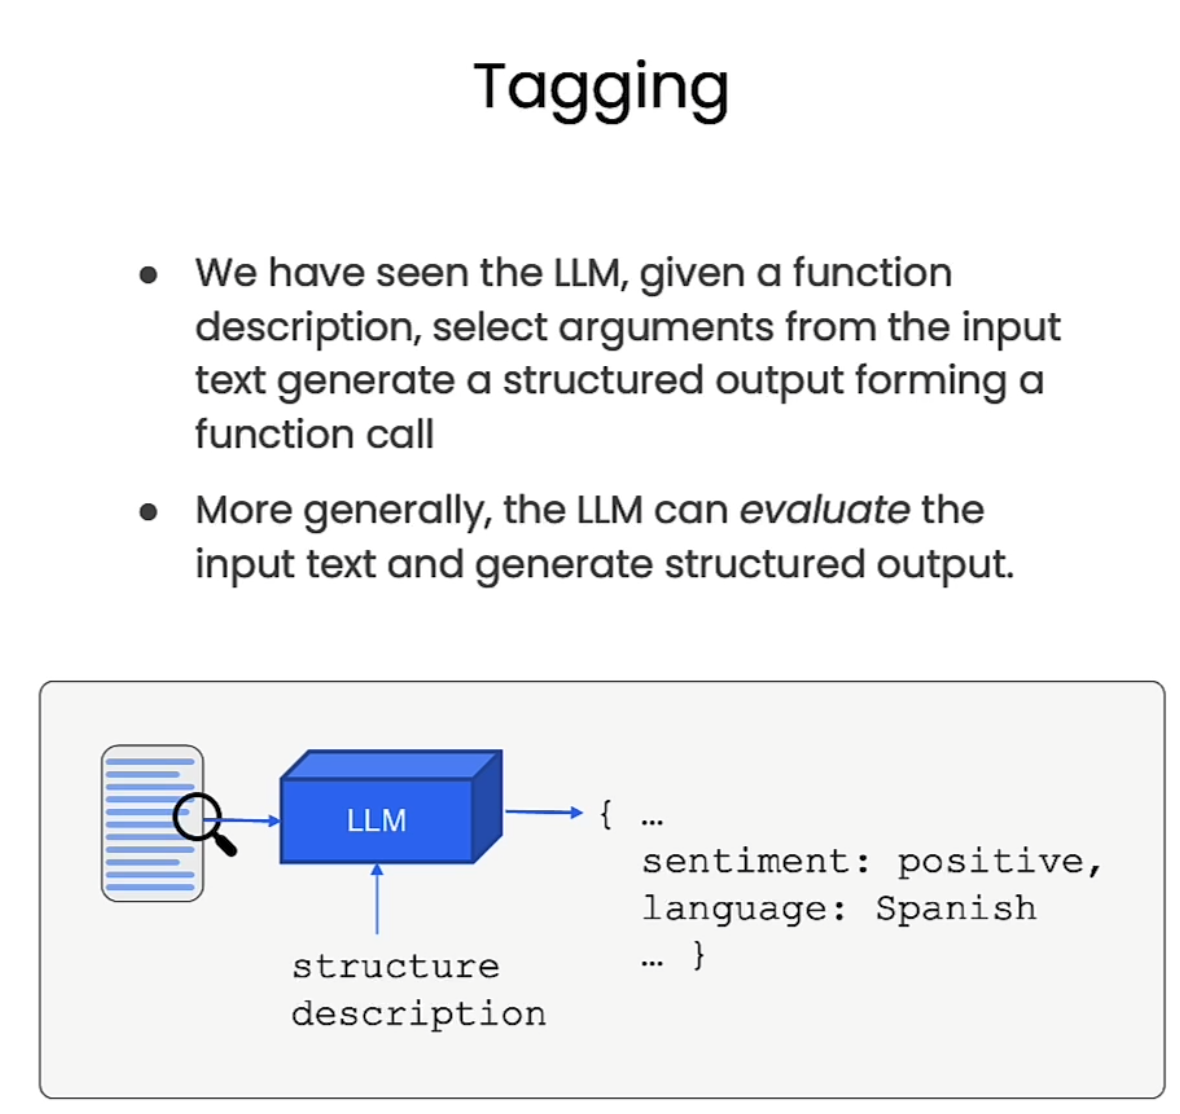

## tagging and extraction using OpenAI functions

In [1]:
import os
import openai
from typing import List
from pydantic import BaseModel, Field
from langchain_core.utils.function_calling import convert_pydantic_to_openai_function

In [3]:
# create a pydantic model
class Tagging(BaseModel):
    """Tag the piece of text with particular info."""
    sentiment: str = Field(description="sentiment of the text, should be `pos`, `neg`, or `neutral`")
    language: str = Field(description="language of the text (should be ISO 639-1 code)")

In [4]:
convert_pydantic_to_openai_function(Tagging)

C:\Users\Villard\AppData\Local\Temp\ipykernel_18292\1725091243.py:1: LangChainDeprecationWarning: The function `convert_pydantic_to_openai_function` was deprecated in LangChain 0.1.16 and will be removed in 1.0. Use :meth:`~langchain_core.utils.function_calling.convert_to_openai_function()` instead.
  convert_pydantic_to_openai_function(Tagging)


{'name': 'Tagging',
 'description': 'Tag the piece of text with particular info.',
 'parameters': {'properties': {'sentiment': {'description': 'sentiment of the text, should be `pos`, `neg`, or `neutral`',
    'type': 'string'},
   'language': {'description': 'language of the text (should be ISO 639-1 code)',
    'type': 'string'}},
  'required': ['sentiment', 'language'],
  'type': 'object'}}

In [5]:
# import our models
from langchain.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

In [6]:
# initiate the model
model = ChatOpenAI(temperature=0)

In [7]:
tagging_functions = [convert_pydantic_to_openai_function(Tagging)]

In [8]:
prompt = ChatPromptTemplate.from_messages([
    ("system", "Think carefully, and then tag the text as instructed"),
    ("user", "{input}")
])

In [9]:
model_with_functions = model.bind(
    functions = tagging_functions,
    function_call = {"name":"Tagging"}
)

In [22]:
structured_llm = model.with_structured_output(Tagging)

In [10]:
tagging_chain = prompt | model_with_functions

In [11]:
tagging_chain.invoke({"input":"I love langchain"})

AIMessage(content='', additional_kwargs={'function_call': {'arguments': '{"sentiment":"pos","language":"en"}', 'name': 'Tagging'}, 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 110, 'total_tokens': 120, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-23ec30b3-4345-41c9-b874-99345156c5ff-0', usage_metadata={'input_tokens': 110, 'output_tokens': 10, 'total_tokens': 120, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [13]:
tagging_chain.invoke({"input":"Nkunda langchain, ituma numve hari ikizere"})

AIMessage(content='', additional_kwargs={'function_call': {'arguments': '{"sentiment":"neutral","language":"rw"}', 'name': 'Tagging'}, 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 120, 'total_tokens': 130, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-85c3056f-3748-479a-94ab-3e177bc79131-0', usage_metadata={'input_tokens': 120, 'output_tokens': 10, 'total_tokens': 130, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [14]:
tagging_chain.invoke({"input":"non mi piace questo cibo"})

AIMessage(content='', additional_kwargs={'function_call': {'arguments': '{"sentiment":"neg","language":"it"}', 'name': 'Tagging'}, 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 113, 'total_tokens': 123, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-9f889c10-dc5d-404e-a6b4-d577ab24968c-0', usage_metadata={'input_tokens': 113, 'output_tokens': 10, 'total_tokens': 123, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:
from langchain_core.output_parsers.openai_functions import JsonOutputFunctionsParser


In [27]:
tagging_chain = prompt | model_with_functions | JsonOutputFunctionsParser()

In [28]:
tagging_chain.invoke({"input":"Nkunda langchain, ituma numve hari ikizere"})

{'sentiment': 'neutral', 'language': 'rw'}

# Extraction
Extraction is similar to tagging, but used for extracting multiple pieces of information

In [29]:
from typing import Optional
class Person(BaseModel):
    """Information about a person"""
    name: str = Field(description="person's name")
    age : Optional[int] = Field(description="person's age")

In [30]:
class Information(BaseModel):
    """Information to extract"""
    people: List[Person] = Field(description="List of info about people")

In [31]:
convert_pydantic_to_openai_function(Information)

{'name': 'Information',
 'description': 'Information to extract',
 'parameters': {'properties': {'people': {'description': 'List of info about people',
    'items': {'description': 'Information about a person',
     'properties': {'name': {'description': "person's name", 'type': 'string'},
      'age': {'anyOf': [{'type': 'integer'}, {'type': 'null'}],
       'description': "person's age"}},
     'required': ['name', 'age'],
     'type': 'object'},
    'type': 'array'}},
  'required': ['people'],
  'type': 'object'}}

In [32]:
extraction_functions =[convert_pydantic_to_openai_function(Information)]
extraction_model = model.bind(functions = extraction_functions, function_call = {"name":"Information"})


In [35]:
print(extraction_model.invoke("Joe is 30, his mom is Martha"))

content='' additional_kwargs={'function_call': {'arguments': '{"people":[{"name":"Joe","age":30},{"name":"Martha","age":null}]}', 'name': 'Information'}, 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 95, 'total_tokens': 116, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-e8524a3b-b07f-43c8-8f2c-993352a028fc-0' usage_metadata={'input_tokens': 95, 'output_tokens': 21, 'total_tokens': 116, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [60]:
# The above invoke returns age even if it was not provided in the prompt, thus we have to build a chain in order to overcome that

prompt =  ChatPromptTemplate.from_messages([
    ("system", "Extract the relevant information, if not explicitly provided do not guess. Extract partial info"),
    ("human", "{input}")
])

In [63]:
extraction_chain = prompt | extraction_model 

In [64]:
extraction_chain.invoke("Joe is 30, his mom is Martha")

AIMessage(content='', additional_kwargs={'function_call': {'arguments': '{"people":[{"name":"Joe","age":30},{"name":"Martha","age":null}]}', 'name': 'Information'}, 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 112, 'total_tokens': 133, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-0829335a-a5bd-47f5-8f0d-000f623da366-0', usage_metadata={'input_tokens': 112, 'output_tokens': 21, 'total_tokens': 133, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [65]:
extraction_chain = prompt | extraction_model | JsonOutputFunctionsParser()

In [66]:
extraction_chain.invoke("Joe is 30, his mom is Martha")

{'people': [{'name': 'Joe', 'age': 30}, {'name': 'Martha', 'age': None}]}

In [67]:
# We are only interested in the json list and not the people key. We can use the following parser to get the list
from langchain_core.output_parsers.openai_functions import JsonKeyOutputFunctionsParser

In [68]:
extraction_chain = prompt | extraction_model | JsonKeyOutputFunctionsParser(key_name="people")

In [69]:
extraction_chain.invoke("Joe is 30, his mom is Martha")

[{'name': 'Joe', 'age': 30}, {'name': 'Martha', 'age': None}]

# Doing it for real
We can apply tagging to a larger body of text
for example, let's load this blog post and extract tag information for sub-set of the text

In [49]:
from langchain.document_loaders import WebBaseLoader
loader = WebBaseLoader("https://lilianweng.github.io/posts/2023-06-23-agent/")
documents = loader.load()


In [51]:
doc = documents[0]

In [53]:
page_content = doc.page_content[:10000]
print(page_content)







LLM Powered Autonomous Agents | Lil'Log







































Lil'Log

















|






Posts




Archive




Search




Tags




FAQ




emojisearch.app









      LLM Powered Autonomous Agents
    
Date: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng


 


Table of Contents



Agent System Overview

Component One: Planning

Task Decomposition

Self-Reflection


Component Two: Memory

Types of Memory

Maximum Inner Product Search (MIPS)


Component Three: Tool Use

Case Studies

Scientific Discovery Agent

Generative Agents Simulation

Proof-of-Concept Examples


Challenges

Citation

References





Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful gene

### Extract and tag from the document

In [75]:
class Overview(BaseModel):
    """Overview of a section of text."""
    summary: str = Field(description="Provide a concise summary of the content.")
    language: str = Field(description="Provide the language that the content is written in.")
    keywords: str = Field(description="Provide keywords related to the content.")

In [78]:
overview_tagging_function = [
    convert_pydantic_to_openai_function(Overview)
]
tagging_model = model.bind(
    functions = overview_tagging_function,
    function_call = {"name":"Overview"}
    )
tagging_chain = prompt | tagging_model | JsonOutputFunctionsParser()

In [77]:
tagging_chain.invoke({"input": page_content})

{'summary': 'The article discusses building autonomous agents powered by LLM (large language model) as the core controller. It covers components like planning, memory, and tool use, along with challenges and references.',
 'language': 'English',
 'keywords': 'LLM, autonomous agents, planning, memory, tool use, challenges, references'}

In [99]:
class Paper(BaseModel):
    """Information about papers mentioned."""
    title: str 
    author: Optional[str]
    
class Info(BaseModel):
    papers: List[Paper]

In [118]:
paper_extraction_function = [
    convert_pydantic_to_openai_function(Info)
]
extraction_model = model.bind(
    functions = paper_extraction_function,
    function_call = {"name":"Info"}
    )

extraction_chain = prompt | extraction_model | JsonKeyOutputFunctionsParser(key_name="papers")



extraction_chain.invoke({"input": page_content})

#### Wrong results returned above
The name and author returned are the ones of the blog and author, the model failed to return references 

This likely caused by a very generic prompt that we use above, we need another prompts specific to this scenario

In [123]:
template = """A article will be passed to you.
Extract from it all papers that are mentioned by this article follow by its author. 
Do not extract the name of the article itself.
If no papers are mentioned that's fine - you don't need to extract any! 
Just return an empty list.
Do not make up or guess ANY extra information. 
Only extract what exactly is in the text.
if there is no author or title Just return an empty list.
"""
prompt = ChatPromptTemplate.from_messages([
    ("system", template),
    ("human", "{input}")
])

extraction_chain = prompt | extraction_model | JsonKeyOutputFunctionsParser(key_name="papers")



In [124]:
extraction_chain.invoke({"input": page_content})

[{'title': 'Chain of thought (CoT; Wei et al. 2022)',
  'author': 'Wei et al. 2022'},
 {'title': 'Tree of Thoughts (Yao et al. 2023)', 'author': 'Yao et al. 2023'},
 {'title': 'LLM+P (Liu et al. 2023)', 'author': 'Liu et al. 2023'},
 {'title': 'ReAct (Yao et al. 2023)', 'author': 'Yao et al. 2023'},
 {'title': 'Reflexion (Shinn & Labash 2023)', 'author': 'Shinn & Labash 2023'},
 {'title': 'Chain of Hindsight (CoH; Liu et al. 2023)',
  'author': 'Liu et al. 2023'},
 {'title': 'Algorithm Distillation (AD; Laskin et al. 2023)',
  'author': 'Laskin et al. 2023'}]

In [125]:
extraction_chain.invoke({"input": "hi"})

[{'title': 'Paper A', 'author': 'Author A'},
 {'title': 'Paper B', 'author': 'Author B'}]

# Using a text splitter to pass large document to our language model

In [128]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_overlap = 0)


In [129]:
splits = text_splitter.split_text(doc.page_content)
print(len(splits))

15


In [130]:
def flatten(matrix):
    flat_list = []
    for row in matrix:
        flat_list += row
    return flat_list

In [132]:
flatten([[1,2], [3, 4]])

[1, 2, 3, 4]

In [133]:
splits[0]

"LLM Powered Autonomous Agents | Lil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n|\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\nemojisearch.app\n\n\n\n\n\n\n\n\n\n      LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\n \n\n\nTable of Contents\n\n\n\nAgent System Overview\n\nComponent One: Planning\n\nTask Decomposition\n\nSelf-Reflection\n\n\nComponent Two: Memory\n\nTypes of Memory\n\nMaximum Inner Product Search (MIPS)\n\n\nComponent Three: Tool Use\n\nCase Studies\n\nScientific Discovery Agent\n\nGenerative Agents Simulation\n\nProof-of-Concept Examples\n\n\nChallenges\n\nCitation\n\nReferences\n\n\n\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring ex

In [134]:
# in order to pass slips we need a RunnableLambda
from langchain.schema.runnable import RunnableLambda

In [135]:
prep = RunnableLambda(
    lambda x: [{"input": doc} for doc in text_splitter.split_text(x)]
    )

In [137]:
# example
prep.invoke("hi")

[{'input': 'hi'}]

In [138]:
# The new chain is build on top of the previous extraction chain
chain = prep | extraction_chain.map() | flatten

In [ ]:
chain.invoke(doc.page_content)

[{'title': 'AutoGPT', 'author': None},
 {'title': 'GPT-Engineer', 'author': None},
 {'title': 'BabyAGI', 'author': None},
 {'title': 'Chain of thought', 'author': 'Wei et al. 2022'},
 {'title': 'Tree of Thoughts', 'author': 'Yao et al. 2023'},
 {'title': 'LLM+P', 'author': 'Liu et al. 2023'},
 {'title': 'ReAct', 'author': 'Yao et al. 2023'},
 {'title': 'Reflexion', 'author': 'Shinn & Labash 2023'},
 {'title': 'Chain of Hindsight (CoH)', 'author': 'Liu et al. 2023'},
 {'title': 'Algorithm Distillation (AD)', 'author': 'Laskin et al. 2023'},
 {'title': 'Miller 1956', 'author': None},
 {'title': 'Duan et al. 2017', 'author': None},
 {'title': 'Laskin et al. 2023', 'author': None},
 {'title': 'Google Blog', 'author': None},
 {'title': 'MRKL (Karpas et al. 2022)', 'author': 'Karpas et al.'},
 {'title': 'TALM (Tool Augmented Language Models; Parisi et al. 2022)',
  'author': 'Parisi et al.'},
 {'title': 'Toolformer (Schick et al. 2023)', 'author': 'Schick et al.'},
 {'title': 'HuggingGPT (Sh

: 